In [1]:
import numpy as np
import scipy as sp


In [109]:
def elfun(t,y,u):
    EL222, EL222_act = y

    tau_off=30
    tau_on=5
    n=4

    k_on = 1/tau_on
    k_off = 1/tau_off

    output = np.zeros((2,))

    # 4 EL222 ---k_on---> 4 EL222*
    # 4 EL222* ---k_off---> 4 EL222

    if u > 0.5:
        # EL222
        # output[0] = - k_on * EL222 ** n

        if EL222 > 0:
            output[0] =  - n * (1/tau_on) * ((1 - EL222) ** (1/n+1)) * (EL222 ** (1- (1/n)))
        else:
            output[0] = 0

        y = EL222

        # output[0] =  - n * tau_on ** n * ((((1-y) * (tau_on ** (-n)) / y) ** (-1/n)) ** (n-1)) / ((tau_on ** n + ((((1-y) * (tau_on ** (-n)) / y) ** (-1/n)) ** (n)) ) ** 2)

        # EL222_act
        output[1] = - output[0]
    else:
        # EL222
        output[0] = k_off * EL222_act
        # EL222_act
        output[1] = - k_off * EL222_act

    return output

In [118]:
from scipy.integrate import solve_ivp

t_span = [0,20]
u = 1
init = [0.9, 0]
init[1] = 1 - init[0]

sol_arr = []
t_arr = []

sol = solve_ivp(elfun,t_span=t_span, y0=init, args=(u,), method='BDF')
sol_arr.append(sol.y)
t_arr.append(sol.t)

t_span = np.array([0,1000]) + sol.t[-1]
u = 0
init = sol.y[:,-1]

sol = solve_ivp(elfun,t_span=t_span, y0=init, args=(u,), method='BDF')
sol_arr.append(sol.y)
t_arr.append(sol.t)

t_span = np.array([0,1000]) + sol.t[-1]
u = 1
init = sol.y[:,-1]

sol = solve_ivp(elfun,t_span=t_span, y0=init, args=(u,), method='BDF')
sol_arr.append(sol.y)
t_arr.append(sol.t)

sol_arr = np.concatenate(sol_arr, axis=1)
t_arr = np.concatenate(t_arr, axis=0)

print(sol_arr.shape)
print(t_arr.shape)
print(sol.y.shape)

/tmp/ipykernel_5273/3556766209.py:21: RuntimeWarning: invalid value encountered in double_scalars
  output[0] =  - n * (1/tau_on) * ((1 - EL222) ** (1/n+1)) * (EL222 ** (1- (1/n)))


ValueError: array must not contain infs or NaNs

In [ ]:
sol.y[:,-1]

array([5.36200081e-55, 1.00000000e+00])

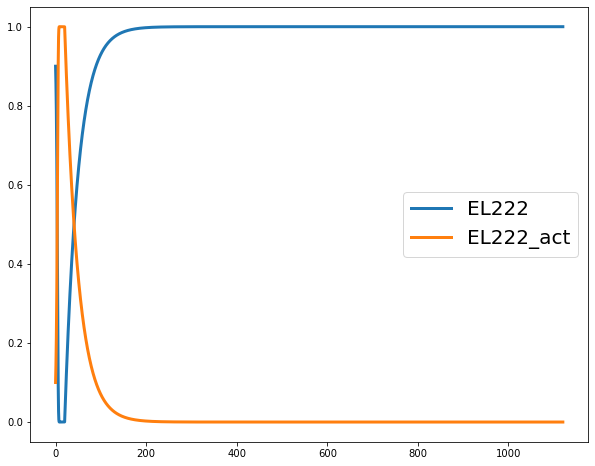

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(t_arr,sol_arr[0,:], linewidth=3, label='EL222')
plt.plot(t_arr,sol_arr[1,:], linewidth=3, label='EL222_act')
plt.legend(fontsize=20)